In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set(font_scale= 1)
import numpy as np


# Preprocessing
### Amount standardization, removing 0s

In [ ]:
def remove_0s(X):
    zero_filt = X['Amount'] == 0
    return X[~zero_filt]


### Outliers

In [ ]:
def sqrt_trans(X):
    for col in outlier_cols:
        X[col] = np.sqrt(X[col])

    return X

### Dealing with skewness in


#Data colection
Used just for the first time

In [2]:
# df = pd.read_csv('data/creditcard.csv')
# df

# StratifiedShuffleSplit into train and test/y_true sets
Used just for the first time

In [3]:
# label = 'Class'
# df[label].value_counts()

In [4]:
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in sss.split(df, df[label]):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     train_df = df.loc[train_index]
#     test_df = df.loc[test_index]
#
# print(train_df.shape)
# print(test_df.shape)

In [5]:
# print(train_df.Class.value_counts())
# print(test_df.Class.value_counts())

In [6]:
# train_df.to_csv('data/train_df', index=False)
# test_df.drop(label, 1).to_csv('data/test_df', index=False)
# test_df[label].to_csv('data/test_df_y_true', index=False)


# Missing data

### Reading in trainting data

In [7]:
df = pd.read_csv('data/train_df')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,0
1,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,0
2,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,0
3,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,0
4,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,0


In [8]:
missing_data = df.isnull().sum()
print('Amount of missing data: ')
print(missing_data.sum())


Amount of missing data: 
0


# EDA

In [9]:
df['Amount'].sort_values()


92907         0.00
10167         0.00
118627        0.00
41517         0.00
73812         0.00
            ...   
154159    11789.84
123869    11898.09
216063    18910.00
64293     19656.53
37720     25691.16
Name: Amount, Length: 227845, dtype: float64

In [10]:
df[df['Amount'] == 0]['Class'].value_counts()

0    1454
1      22
Name: Class, dtype: int64

<AxesSubplot:xlabel='Time', ylabel='Count'>

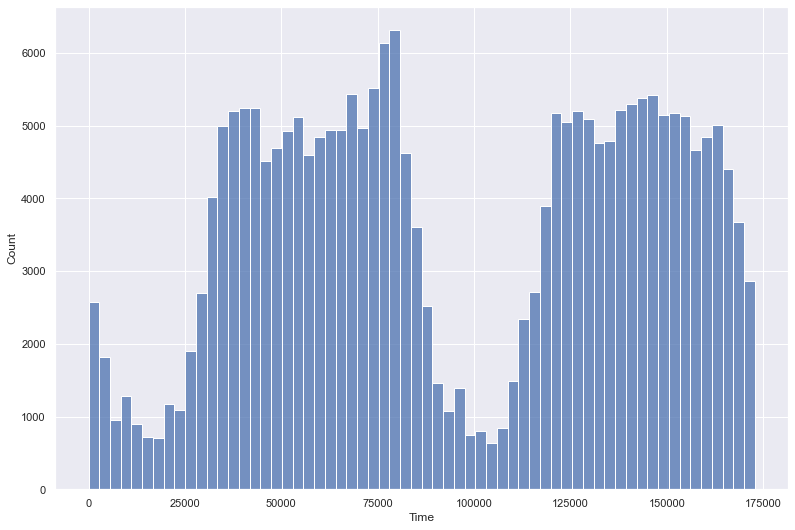

In [11]:
sns.set(font_scale=1)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(df['Time'])

In [12]:
df['Time'].sort_values().head(7)

137437    0.0
186348    0.0
48699     1.0
208002    1.0
11772     2.0
178498    4.0
204980    7.0
Name: Time, dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    227845 non-null  float64
 1   V1      227845 non-null  float64
 2   V2      227845 non-null  float64
 3   V3      227845 non-null  float64
 4   V4      227845 non-null  float64
 5   V5      227845 non-null  float64
 6   V6      227845 non-null  float64
 7   V7      227845 non-null  float64
 8   V8      227845 non-null  float64
 9   V9      227845 non-null  float64
 10  V10     227845 non-null  float64
 11  V11     227845 non-null  float64
 12  V12     227845 non-null  float64
 13  V13     227845 non-null  float64
 14  V14     227845 non-null  float64
 15  V15     227845 non-null  float64
 16  V16     227845 non-null  float64
 17  V17     227845 non-null  float64
 18  V18     227845 non-null  float64
 19  V19     227845 non-null  float64
 20  V20     227845 non-null  float64
 21  V21     22

In [14]:
pd.set_option('display.max_columns', None)
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,94885.093704,0.000795,-0.000481,-0.000383,-0.000020,0.000175,-0.001171,0.000077,-0.000434,0.000702,-0.000389,-0.000787,0.002718,-0.000493,-0.000059,0.000744,-0.001070,0.000390,0.000056,0.000664,-0.000999,0.000370,0.000303,0.000050,-0.000277,-0.000655,0.000126,-0.000070,0.000154,88.176298,0.001729
std,47488.415034,1.958926,1.649092,1.515292,1.415867,1.379569,1.331218,1.238431,1.191482,1.097351,1.086252,1.019200,0.996509,0.994103,0.955993,0.915143,0.874243,0.844235,0.838874,0.813931,0.770806,0.734963,0.725735,0.627419,0.605322,0.521236,0.481939,0.404934,0.326939,250.722602,0.041548
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54228.000000,-0.919893,-0.598761,-0.891767,-0.847111,-0.692100,-0.768603,-0.553481,-0.207839,-0.640307,-0.535655,-0.761844,-0.401593,-0.648607,-0.425825,-0.582648,-0.469107,-0.483409,-0.499150,-0.455036,-0.211651,-0.228250,-0.542056,-0.161932,-0.354843,-0.316907,-0.326491,-0.070740,-0.052931,5.640000,0.000000
50%,84805.000000,0.018692,0.064746,0.179859,-0.021361,-0.054757,-0.274156,0.040420,0.023219,-0.050653,-0.093332,-0.031419,0.142381,-0.014348,0.049571,0.048400,0.065080,-0.065550,-0.003484,0.005351,-0.062606,-0.029280,0.006599,-0.010983,0.040778,0.016081,-0.051623,0.001463,0.011221,22.000000,0.000000
75%,139364.000000,1.315616,0.803876,1.026457,0.742281,0.611259,0.397501,0.570530,0.327824,0.598254,0.454469,0.737457,0.620148,0.661868,0.492066,0.649549,0.521521,0.400099,0.500425,0.459782,0.132702,0.186365,0.528282,0.147589,0.438966,0.349880,0.240835,0.091180,0.078118,77.490000,0.000000
max,172792.000000,2.451888,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.572113,39.420904,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,33.847808,25691.160000,1.000000


In [15]:
# for col in df.columns:
#     fig, ax = plt.subplots(figsize=a4_dims)
#     sns.histplot(df[col])
#     plt.title(col)
#     plt.show()

In [16]:
#todo check distros of
outlier_cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',]

In [17]:
fraud_filt = df['Class'] == 1
fraud_df = df[fraud_filt]
non_fraud_df = df[~fraud_filt]

In [18]:
fraud_df.describe()['Amount']

count     394.000000
mean      125.591472
std       262.350158
min         0.000000
25%         1.000000
50%         9.170000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [19]:
fraud_df.sort_values(by='Amount', ascending=False)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
172419,122608.0,-2.003460,-7.159042,-4.050976,1.309580,-2.058102,-0.098621,2.880083,-0.727484,1.460381,-1.531608,-1.394328,-0.220719,-1.530990,1.075248,0.388383,-0.660655,0.093321,0.335742,0.057551,3.973217,1.244287,-1.015232,-1.800985,0.657586,-0.435617,-0.894509,-0.397557,0.314262,2125.87,1
29760,154278.0,-1.600211,-3.488130,-6.459303,3.246816,-1.614608,-1.260375,0.288223,-0.048964,-0.734975,-4.441484,2.944375,-3.805469,-2.102227,-6.106183,-0.641736,-1.555963,-2.084067,0.394247,0.083380,3.189355,1.191175,-0.967141,-1.463421,-0.624231,-0.176462,0.400348,0.152947,0.477775,1504.93,1
168977,62467.0,-5.344665,-0.285760,-3.835616,5.337048,-7.609909,3.874668,1.289630,0.201742,-3.003532,-3.990551,4.986014,-6.116383,0.042324,-6.043393,1.821401,-4.745462,-10.075646,-3.604596,1.435294,-1.562162,0.276011,1.342045,-1.016579,-0.071361,-0.335869,0.441044,1.520613,-1.115937,1402.16,1
53860,59011.0,-2.326922,-3.348439,-3.513408,3.175060,-2.815137,-0.203363,-0.892144,0.333226,-0.802005,-4.350685,3.064246,-2.718731,0.068788,-5.586873,-0.966076,-2.502049,-4.460495,-0.870526,0.595629,3.209171,1.226648,-0.695902,-1.478490,-0.061553,0.236155,0.531911,0.302324,0.536375,1389.56,1
216265,65385.0,-2.923827,1.524837,-3.018758,3.289291,-5.755542,2.218276,-0.509995,-3.569444,-1.016592,-4.320536,1.277202,-3.701750,-0.971870,-4.857777,0.090606,-2.801502,-4.186808,-1.648406,1.176446,-0.447039,-0.511657,-0.122724,-4.288639,0.563797,-0.949451,-0.204532,1.510206,-0.324706,1354.25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50854,102669.0,-5.603690,5.222193,-7.516830,8.117724,-2.756858,-1.574565,-6.330343,2.998419,-4.508167,-7.334377,7.188724,-10.655181,2.594680,-10.242859,-0.191158,-5.504334,-8.697777,-1.934225,1.958750,0.227526,1.242896,0.428408,-0.101184,-0.520199,-0.176938,0.461450,-0.106625,-0.479662,0.00,1
23015,102114.0,-28.255053,21.467203,-26.871339,11.737436,-17.999630,6.065901,-41.506796,-38.987263,-13.434066,-24.403185,3.409323,-9.608267,-3.076318,0.240060,-2.836677,-6.594757,-12.957531,-5.613522,-0.248828,10.440718,-21.453736,8.361985,4.909111,0.098328,-1.508739,0.008711,-5.407824,-0.183811,0.00,1
31843,85285.0,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,-8.409665,6.309044,-8.576761,0.246747,-11.534046,-0.364265,-5.452495,-11.887570,-3.563585,0.876019,0.545698,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.00,1
133634,125658.0,0.224414,2.994499,-3.432458,3.986519,3.760233,0.165640,1.099378,-0.654557,-2.435416,-2.276733,1.846079,-1.961195,-0.851166,-7.122316,1.019605,2.131015,6.443649,1.592538,-3.681904,-0.200846,0.491337,-0.984223,-0.421979,-1.048058,0.726412,0.268625,0.283689,0.419102,0.00,1


In [20]:
# for col in fraud_df.columns:
#     fig, ax = plt.subplots(figsize=a4_dims)
#     sns.histplot(fraud_df[col])
#     plt.title(col)
#     plt.show()

In [21]:
under_1_f = fraud_df[fraud_df['Amount'] <= 1].shape[0]
print('Percentage of transactions under or equal to 1 in frauds:')
print(under_1_f / fraud_df.shape[0] * 100)

Percentage of transactions under or equal to 1 in frauds:
36.80203045685279


In [22]:
under_1_nf = non_fraud_df[non_fraud_df['Amount'] <= 1].shape[0]
print('Percentage of transactions under or equal to 1 in non_frauds:')
print(under_1_nf / non_fraud_df.shape[0] * 100)

Percentage of transactions under or equal to 1 in non_frauds:
10.628662876839408


In [23]:
df[outlier_cols].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,0.000795,-0.000481,-0.000383,-0.000020,0.000175,-0.001171,0.000077,-0.000434,0.000702,-0.000389,-0.000787,0.002718,-0.000493,-0.000059,0.000744,-0.001070,0.000390,0.000056,0.000664,-0.000999,0.000370,0.000303,0.000050,-0.000277,-0.000655,0.000126,-0.000070,0.000154,88.176298
std,1.958926,1.649092,1.515292,1.415867,1.379569,1.331218,1.238431,1.191482,1.097351,1.086252,1.019200,0.996509,0.994103,0.955993,0.915143,0.874243,0.844235,0.838874,0.813931,0.770806,0.734963,0.725735,0.627419,0.605322,0.521236,0.481939,0.404934,0.326939,250.722602
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,-0.919893,-0.598761,-0.891767,-0.847111,-0.692100,-0.768603,-0.553481,-0.207839,-0.640307,-0.535655,-0.761844,-0.401593,-0.648607,-0.425825,-0.582648,-0.469107,-0.483409,-0.499150,-0.455036,-0.211651,-0.228250,-0.542056,-0.161932,-0.354843,-0.316907,-0.326491,-0.070740,-0.052931,5.640000
50%,0.018692,0.064746,0.179859,-0.021361,-0.054757,-0.274156,0.040420,0.023219,-0.050653,-0.093332,-0.031419,0.142381,-0.014348,0.049571,0.048400,0.065080,-0.065550,-0.003484,0.005351,-0.062606,-0.029280,0.006599,-0.010983,0.040778,0.016081,-0.051623,0.001463,0.011221,22.000000
75%,1.315616,0.803876,1.026457,0.742281,0.611259,0.397501,0.570530,0.327824,0.598254,0.454469,0.737457,0.620148,0.661868,0.492066,0.649549,0.521521,0.400099,0.500425,0.459782,0.132702,0.186365,0.528282,0.147589,0.438966,0.349880,0.240835,0.091180,0.078118,77.490000
max,2.451888,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.572113,39.420904,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,33.847808,25691.160000


In [51]:
def sqrt_trans(X):
    for col in outlier_cols:
        X[col] = np.sqrt(X[col])

    return X


In [25]:
test_df = df

In [52]:
sqrt_trans_df = sqrt_trans(test_df)

c:\users\patoj\anaconda3\envs\ml_tutorials\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


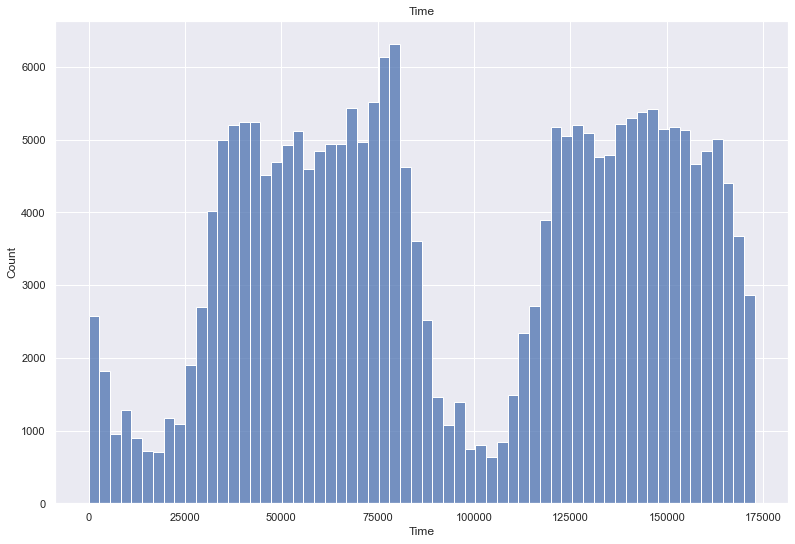

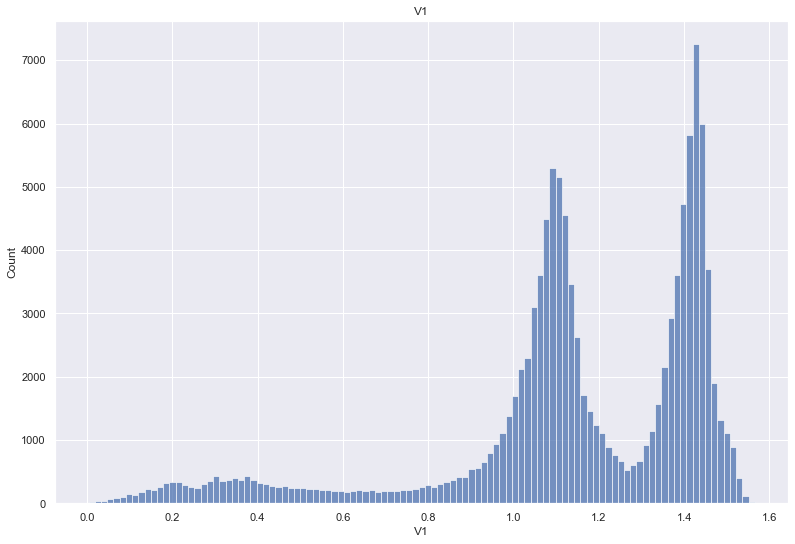

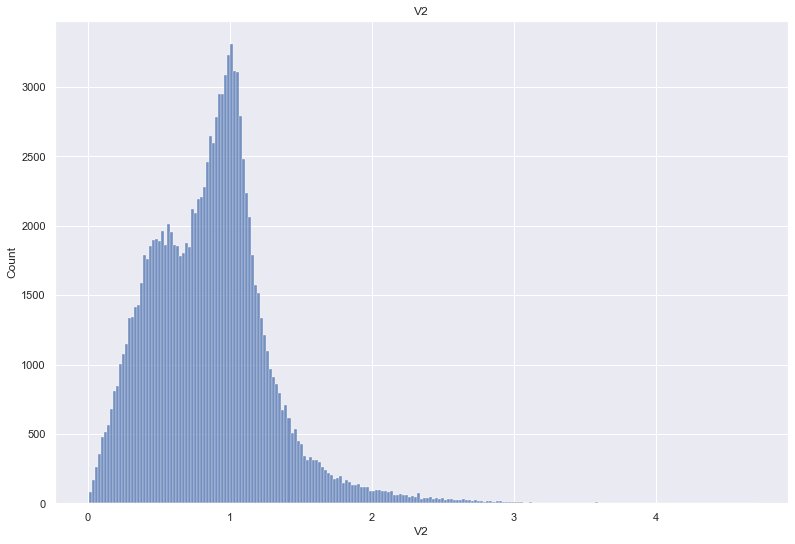

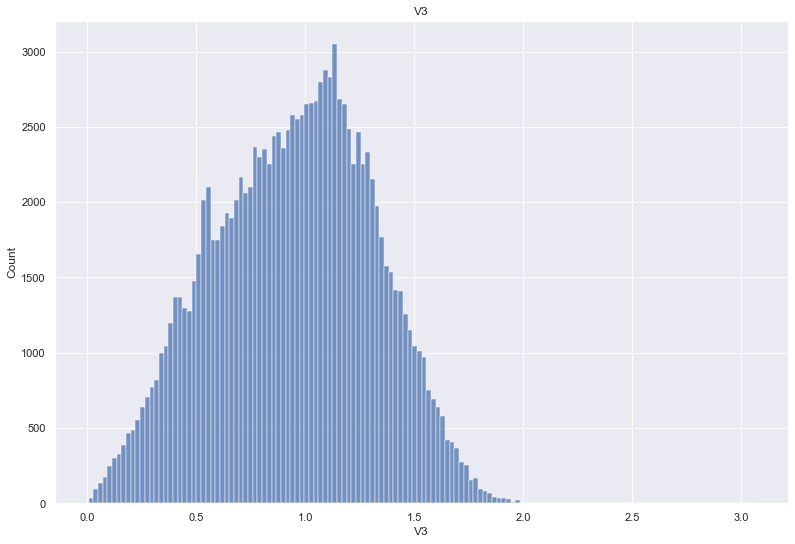

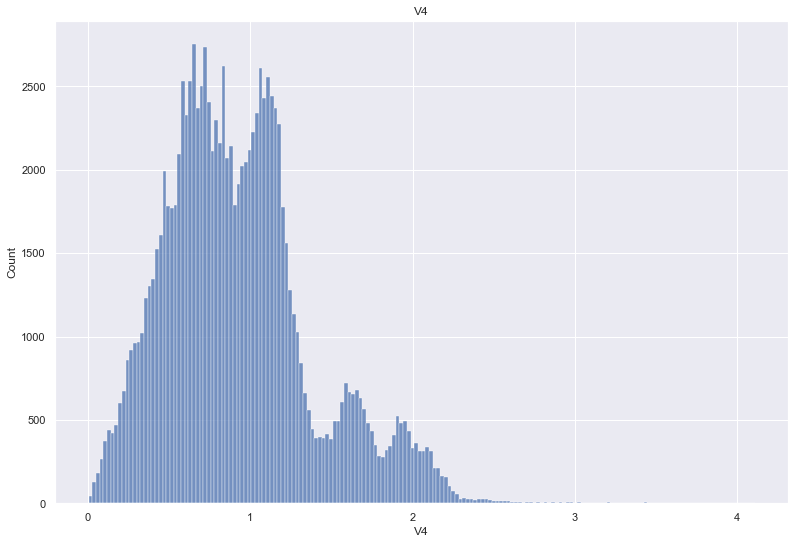

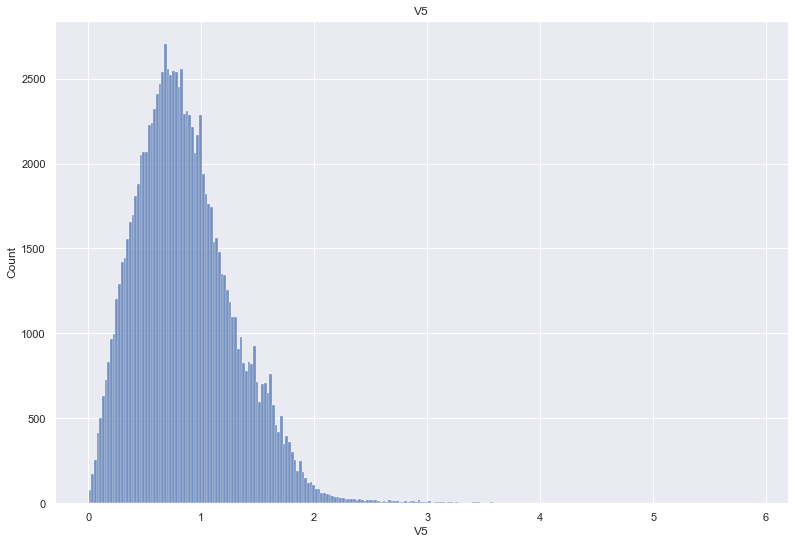

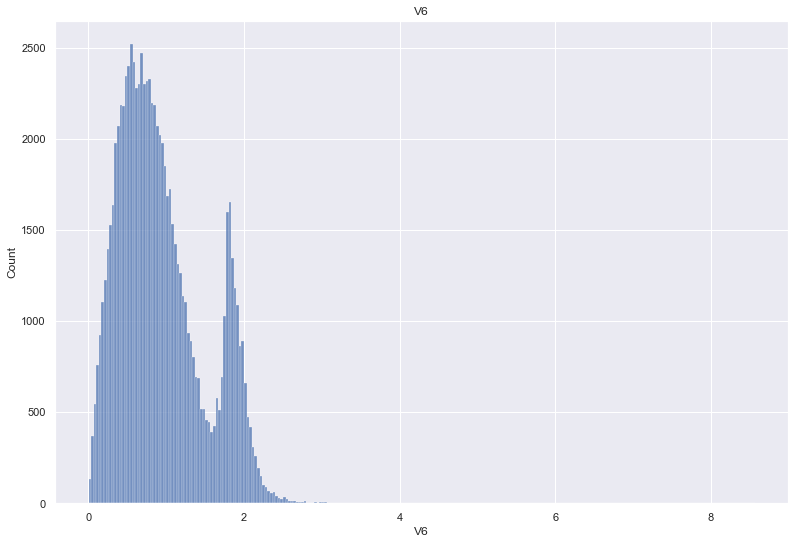

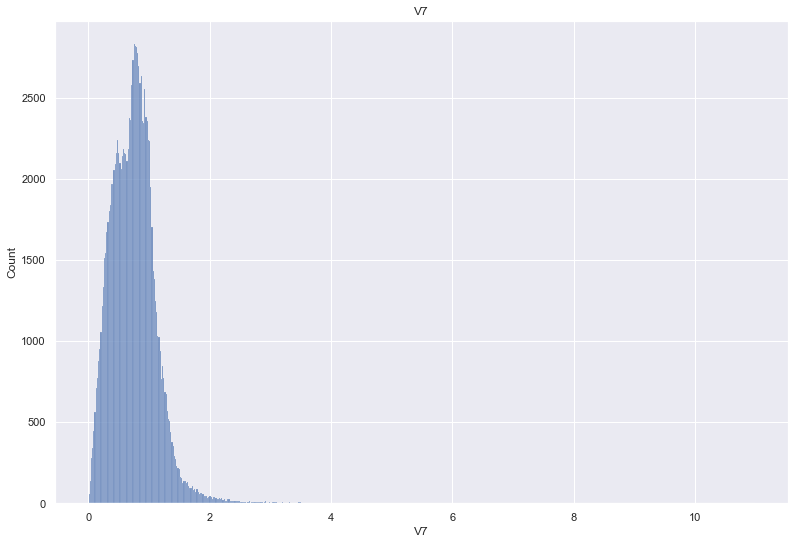

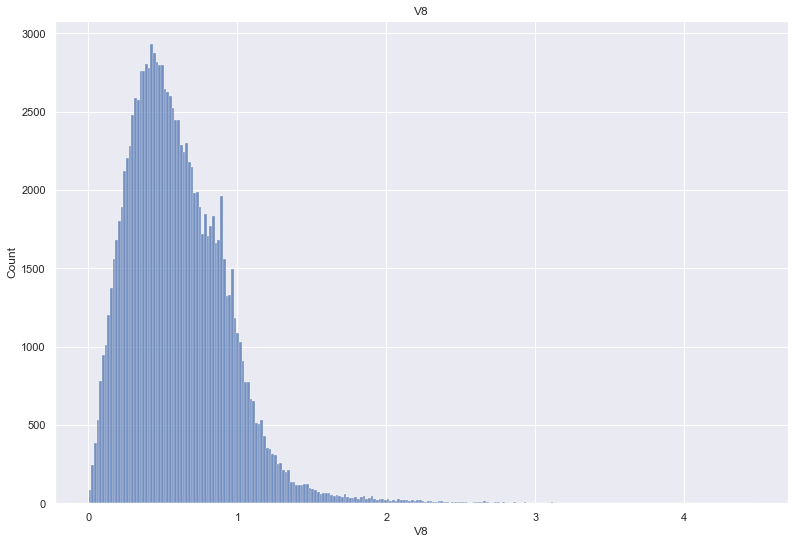

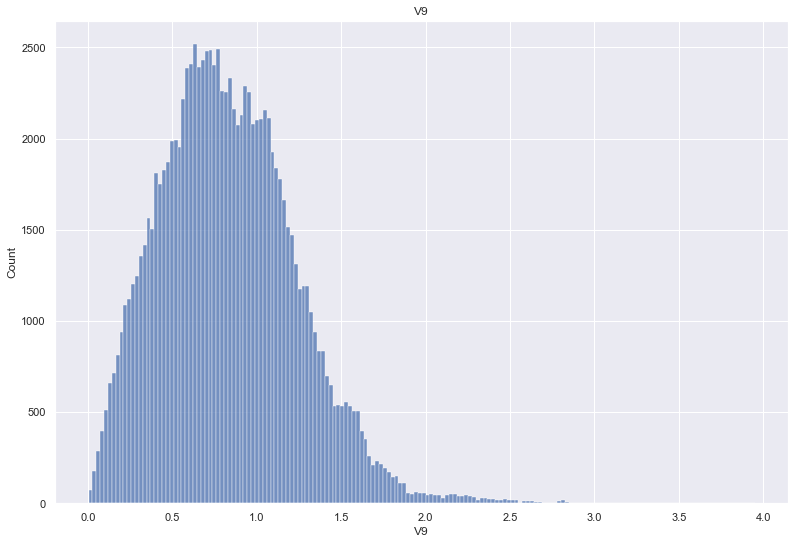

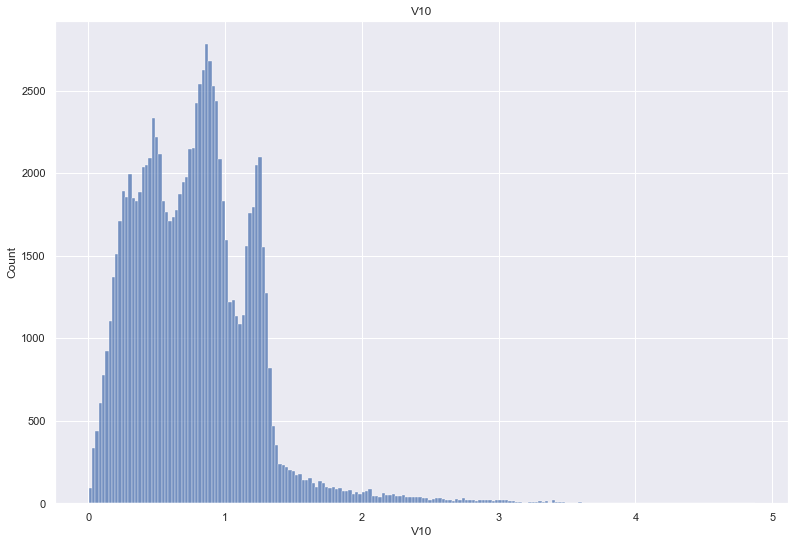

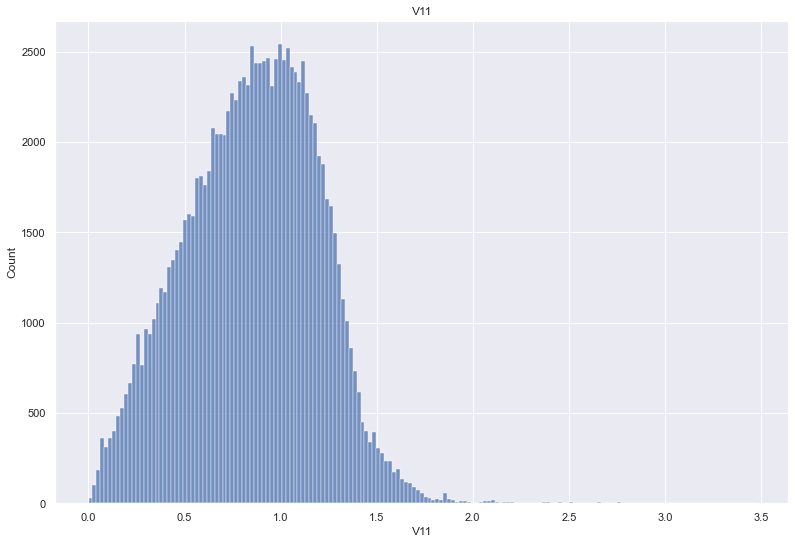

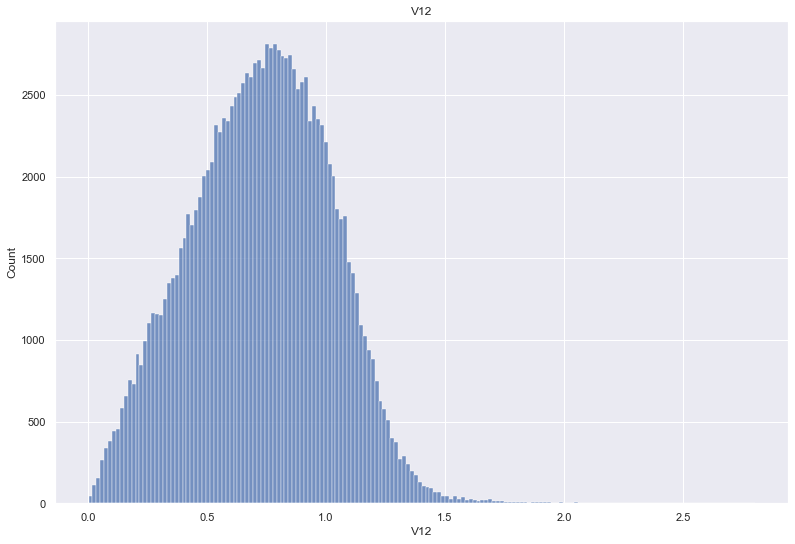

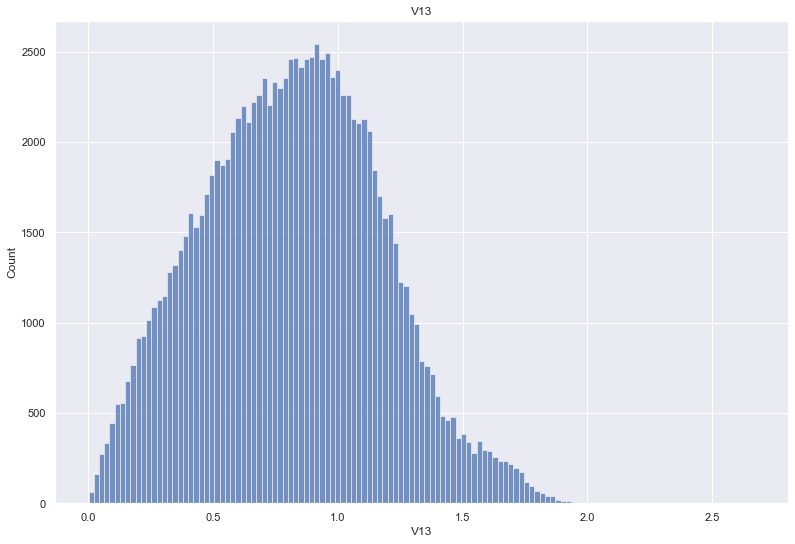

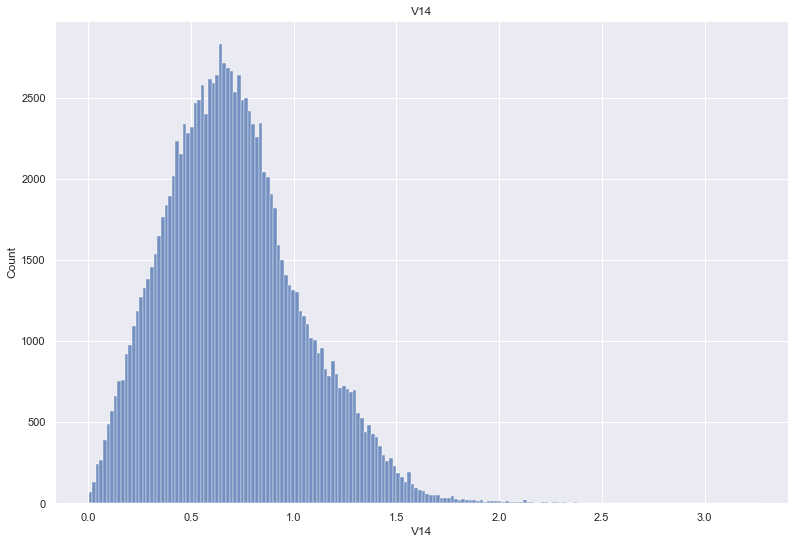

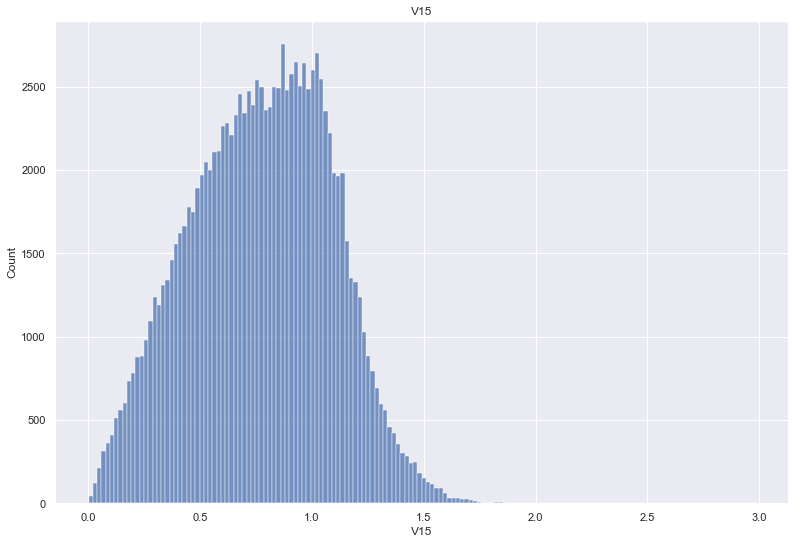

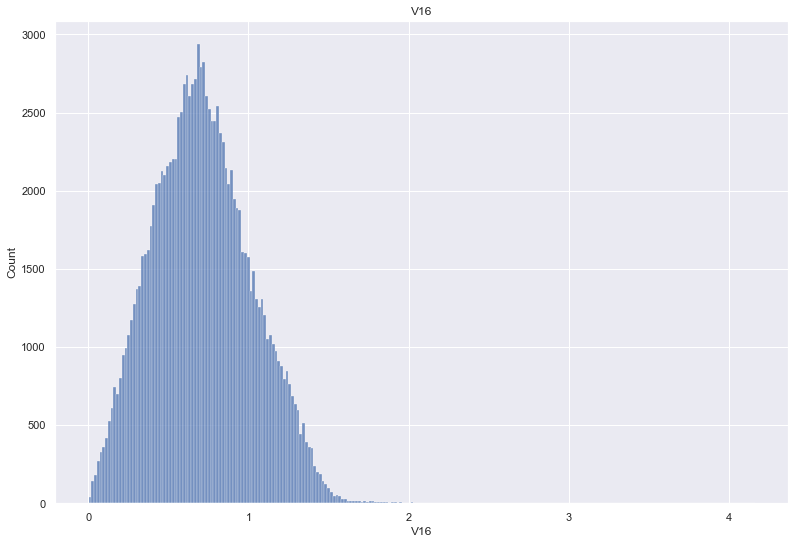

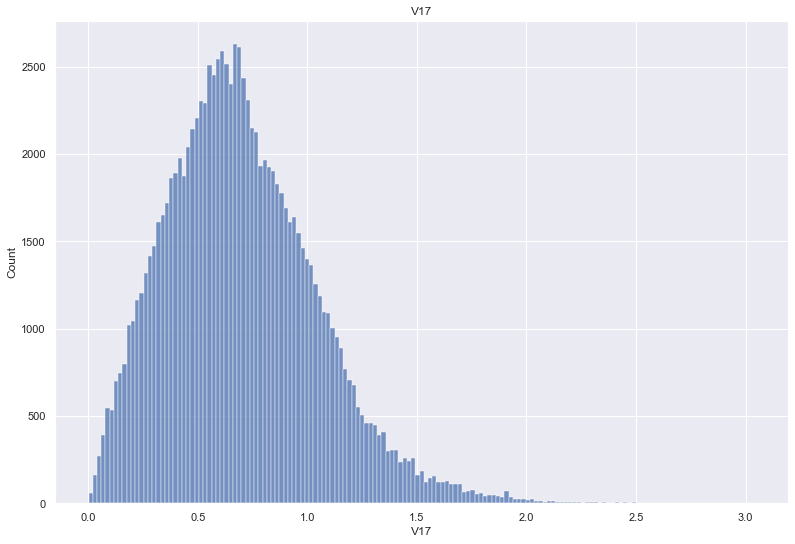

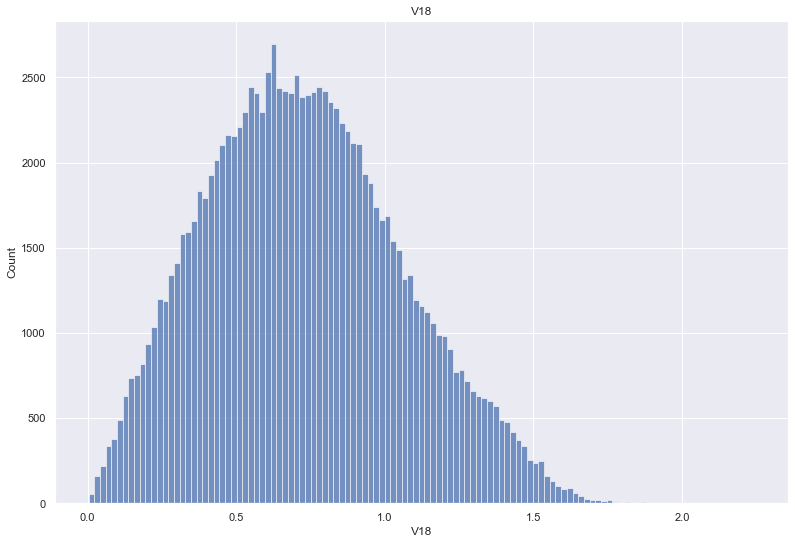

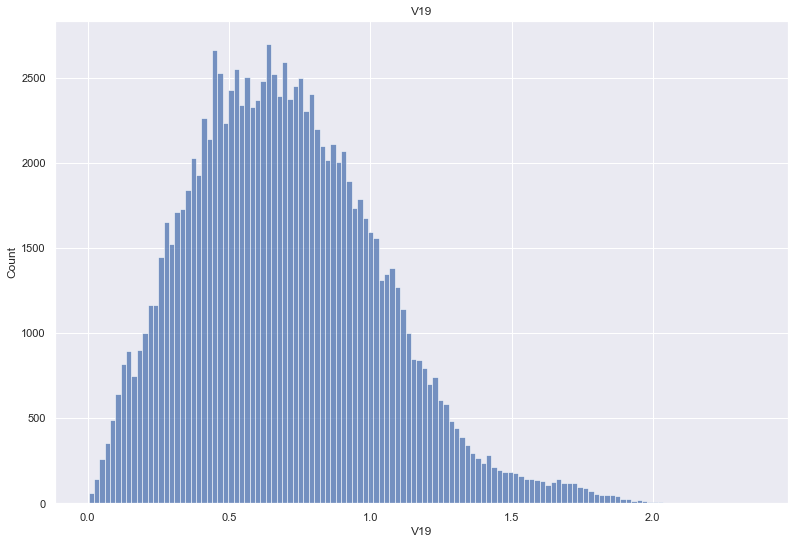

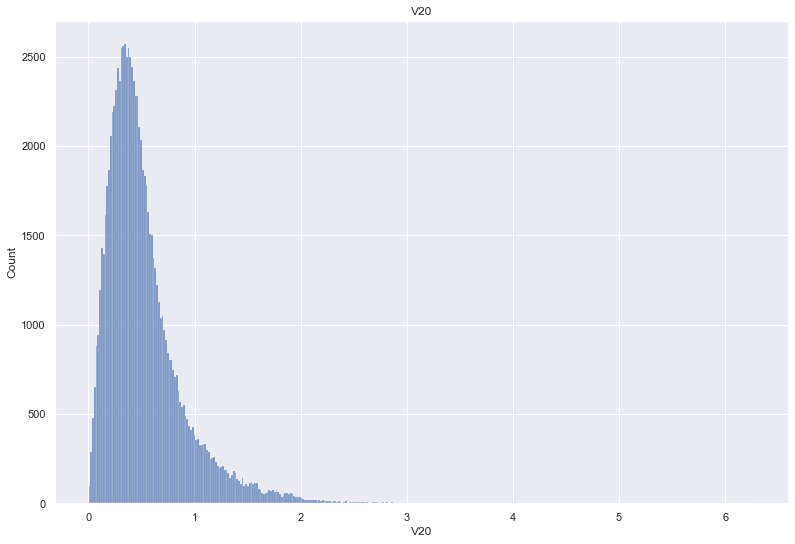

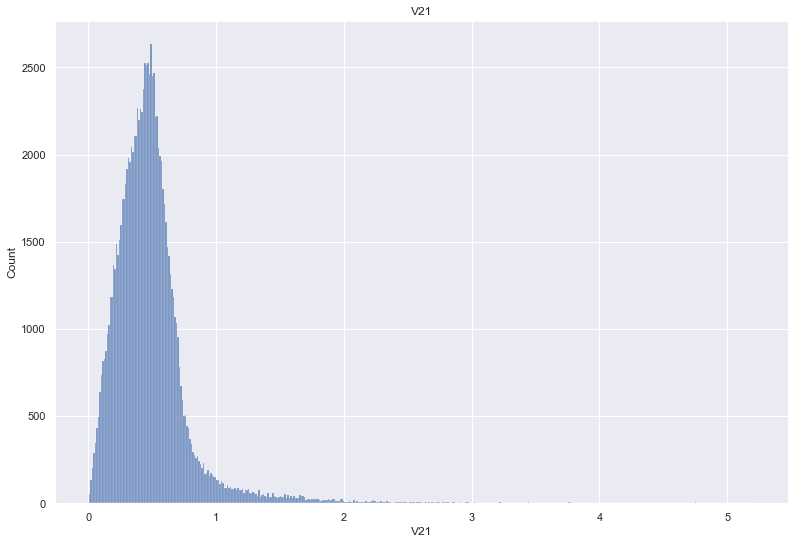

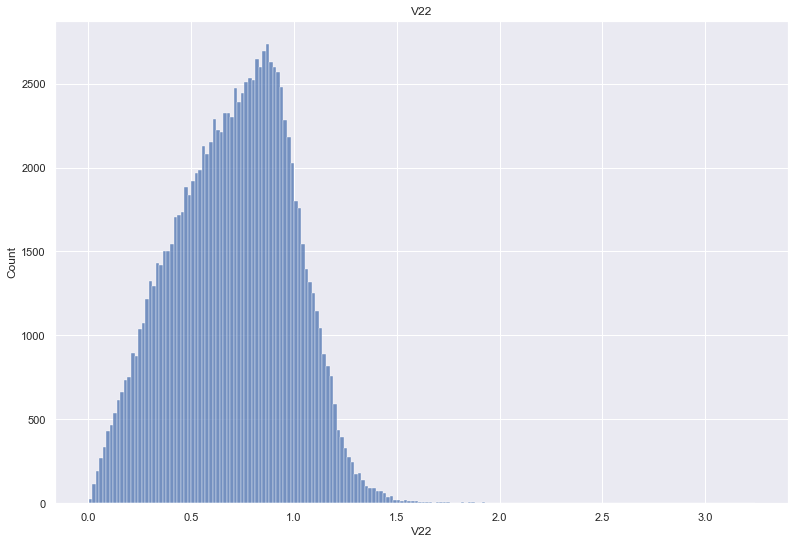

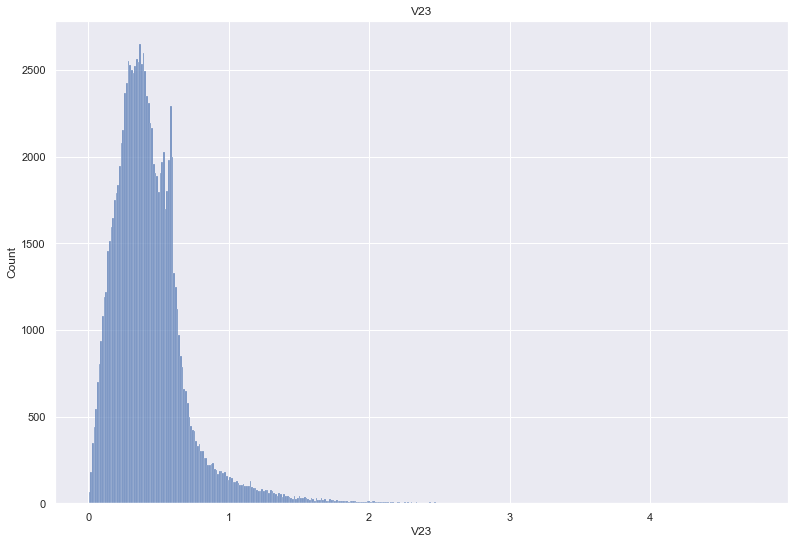

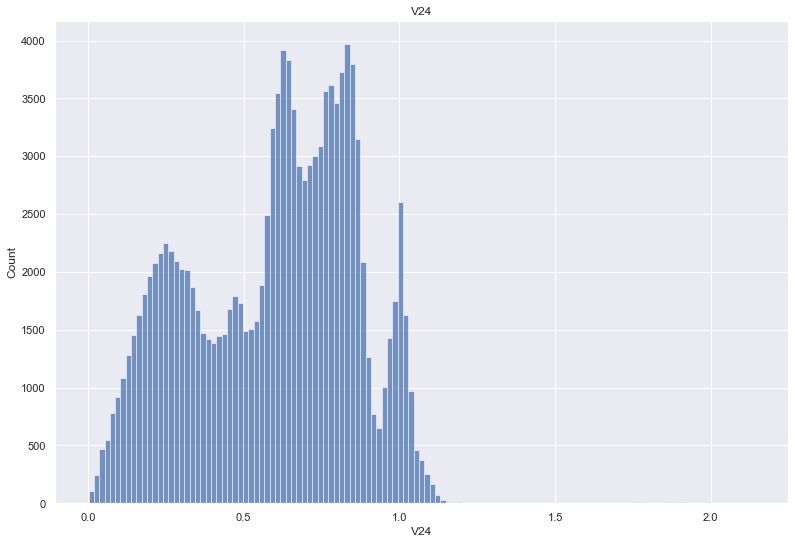

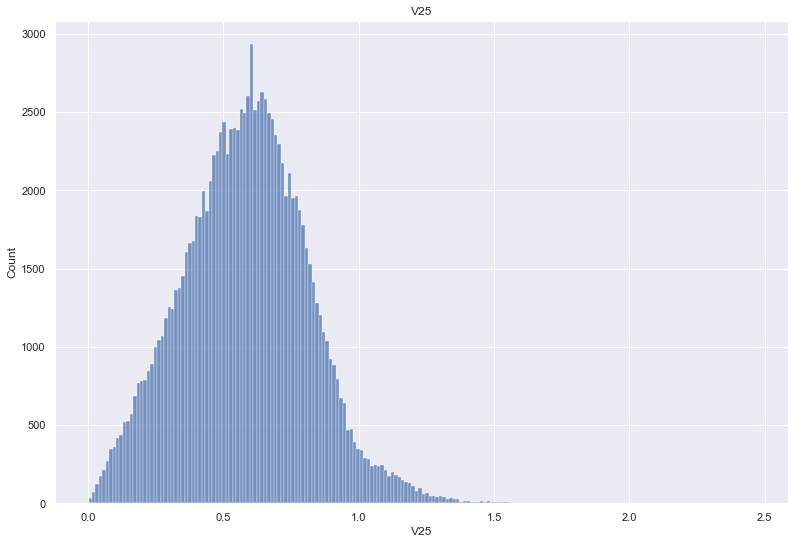

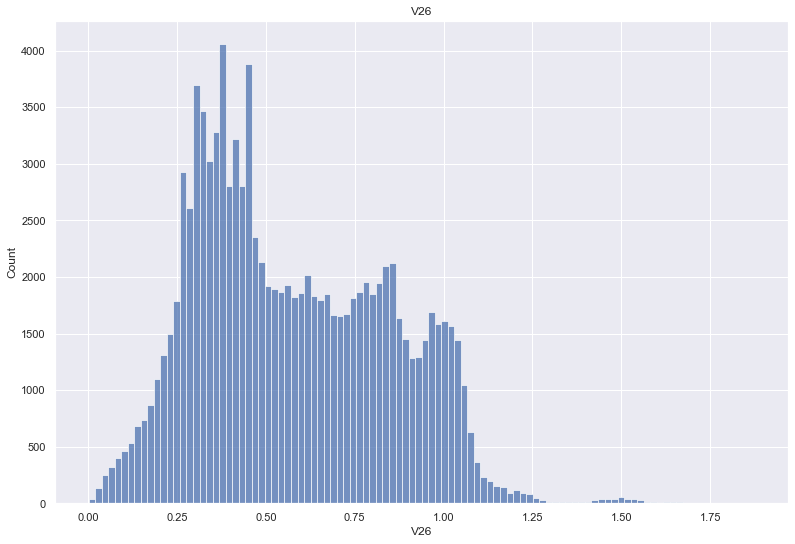

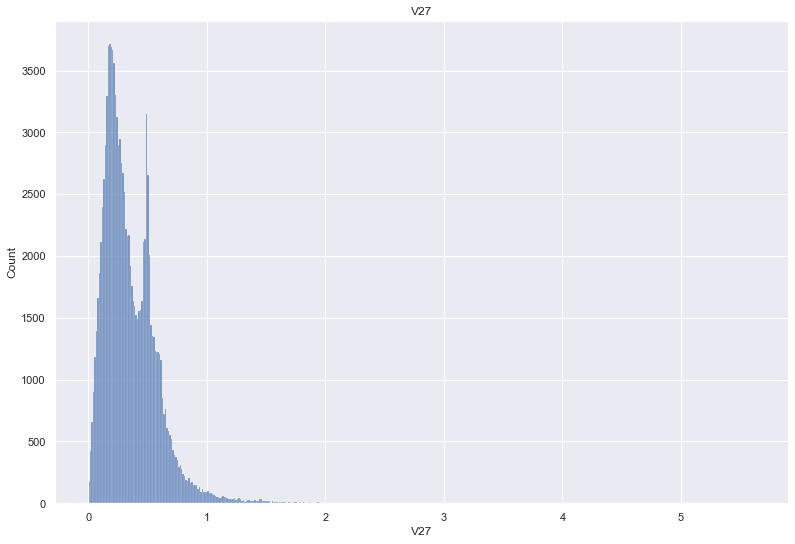

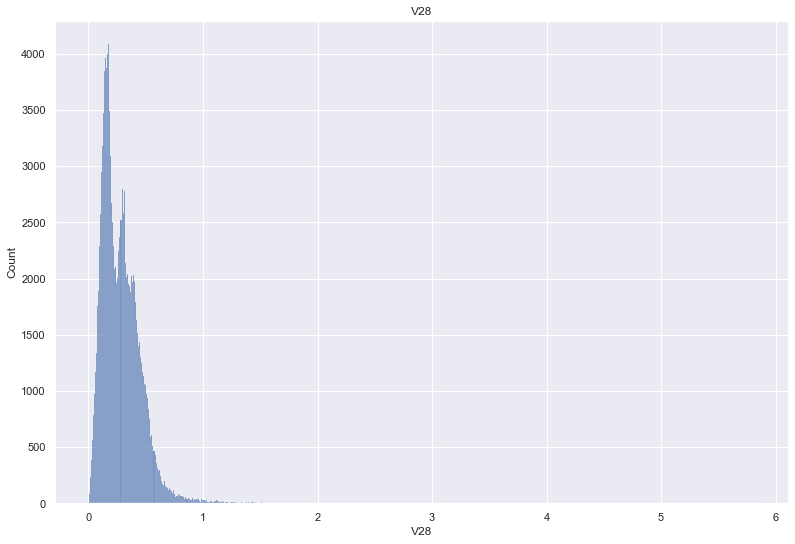

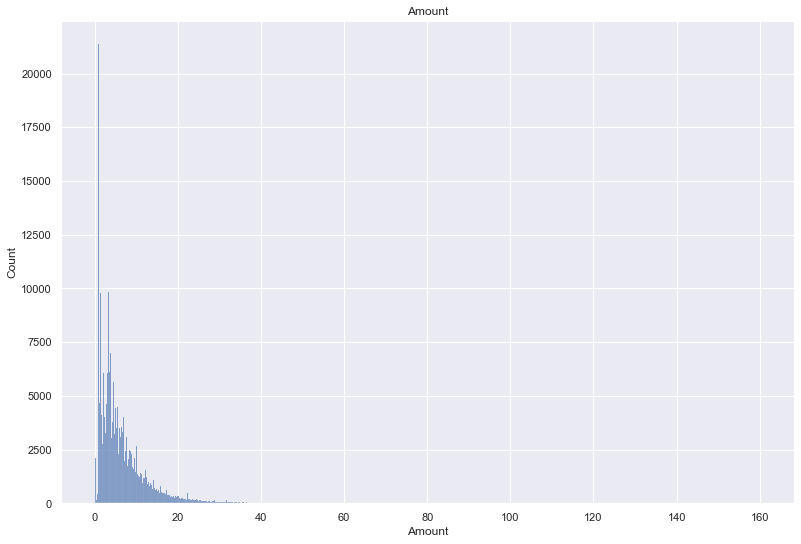

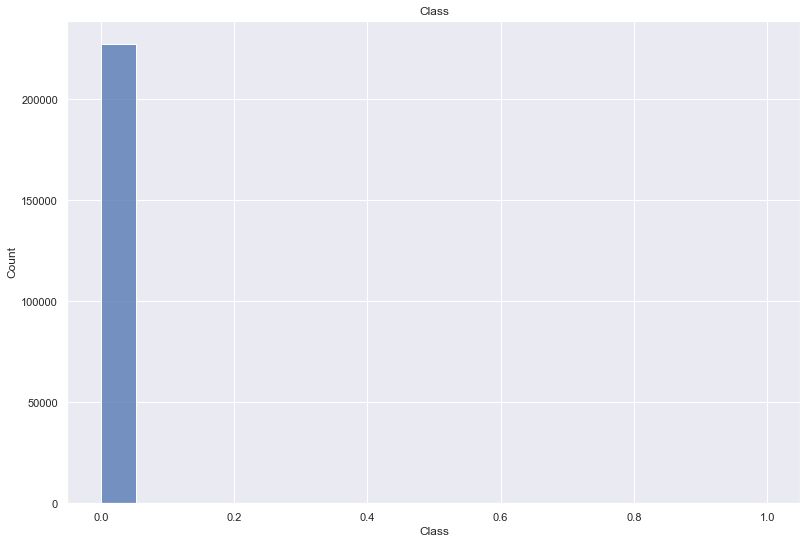

In [53]:
for col in sqrt_trans_df.columns:
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.histplot(sqrt_trans_df[col])
    plt.title(col)
    plt.show()



In [48]:
df[df['Amount'] == 0.001]






,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
